**CUSTOMER SEGMENTATION - CLUSTERING**

### 1)**Importing the Dataset and Exploring It**



In [ ]:
import pandas as pd
import numpy as np

In [ ]:

cust_segment=pd.DataFrame(pd.read_csv('customer_segmentation.csv'))
cust_segment.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
cust_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
cust_segment.shape

(2240, 29)

In [ ]:
cust_segment.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [ ]:
cust_segment.duplicated().sum()

np.int64(0)

In [ ]:
cust_segment.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


**DATA TRANSFORMATION**

In [ ]:
cust_segment['Total_Accepted']=cust_segment[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(axis=1)
cust_segment['Total_Purchase']=cust_segment[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis=1)
cust_segment['Total_Spent']=cust_segment[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

In [ ]:
cust_segment['Online_Share']=cust_segment['NumWebPurchases']/cust_segment['Total_Purchase']
cust_segment['Catalog_Share']=cust_segment['NumCatalogPurchases']/cust_segment['Total_Purchase']
cust_segment['Store_Share']=cust_segment['NumStorePurchases']/cust_segment['Total_Purchase']

In [ ]:
cust_segment['WineShare']  = cust_segment['MntWines'] / cust_segment['Total_Spent']
cust_segment['MeatShare']  = cust_segment['MntMeatProducts'] / cust_segment['Total_Spent']
cust_segment['SweetShare'] = cust_segment['MntSweetProducts'] / cust_segment['Total_Spent']
cust_segment['GoldShare']  = cust_segment['MntGoldProds'] / cust_segment['Total_Spent']
cust_segment['FruitShare'] = cust_segment['MntFruits'] / cust_segment['Total_Spent']

**FEATURE ENGINEERING & CATEGORICAL ENCODING**

In [ ]:
cust_segment=cust_segment.drop(columns=['ID','Dt_Customer','Complain','Z_CostContact','Z_Revenue','Response'])

In [ ]:
cust_segment=cust_segment.drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'])

In [ ]:
cust_segment['Income']=cust_segment['Income'].fillna(cust_segment['Income'].median())

In [ ]:
cust_segment['Marital_Status'].unique()


array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
cust_segment['Marital_Status'] = cust_segment['Marital_Status'].replace({
    'Married':'Couple',
    'Together':'Couple',
    'Single':'Single',
    'Divorced':'Separated',
    'Widow':'Separated',
    'Alone':'Single',
    'Absurd':'Other',
    'YOLO':'Other'
})
cust_segment['Marital_Status_Encoded']=(cust_segment['Marital_Status'].astype('category').cat.codes)
cust_segment['Marital_Status_Encoded'].unique()

array([3, 0, 2, 1], dtype=int8)

In [ ]:
cust_segment['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
cust_segment['Education_Encoded']=cust_segment['Education'].map({
    'Basic':0,
    '2n Cycle':1,
    'Graduation':2,
    'Master':3,
    'PhD':4
})
cust_segment['Education_Encoded'].unique()

array([2, 4, 3, 0, 1])

In [ ]:
cust_segment['Age']=2025-cust_segment['Year_Birth']
cust_segment=cust_segment.drop(columns=['Year_Birth'])

cust_segment['Family_Size'] = 1 + cust_segment['Kidhome'] + cust_segment['Teenhome']
cust_segment=cust_segment.drop(columns=['Kidhome','Teenhome'])


In [ ]:
print(f"Final searching for missing values  \n{cust_segment.isna().sum()}")

Final searching for missing values  
Education                 0
Marital_Status            0
Income                    0
Recency                   0
MntWines                  0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
Total_Accepted            0
Total_Purchase            0
Total_Spent               0
Online_Share              4
Catalog_Share             4
Store_Share               4
WineShare                 0
MeatShare                 0
SweetShare                0
GoldShare                 0
FruitShare                0
Marital_Status_Encoded    0
Education_Encoded         0
Age                       0
Family_Size               0
dtype: int64


In [ ]:
for col in ['Online_Share','Catalog_Share','Store_Share']:
  cust_segment[col]=cust_segment[col].fillna(cust_segment[col].median())

In [ ]:
cust_segment[['Online_Share','Catalog_Share','Store_Share']].describe()


,Online_Share,Catalog_Share,Store_Share
count,2240.000000,2240.000000,2240.000000
mean,0.267280,0.141956,0.409964
std,0.099573,0.127104,0.119525
min,0.000000,0.000000,0.000000
25%,0.200000,0.000000,0.333333
50%,0.259259,0.120000,0.411765
75%,0.333333,0.222222,0.500000
max,1.000000,1.000000,1.000000


### **Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap


### The plot below shows the age distribution of customers. As we can see, there is an outlier on the right tail of the distribution.

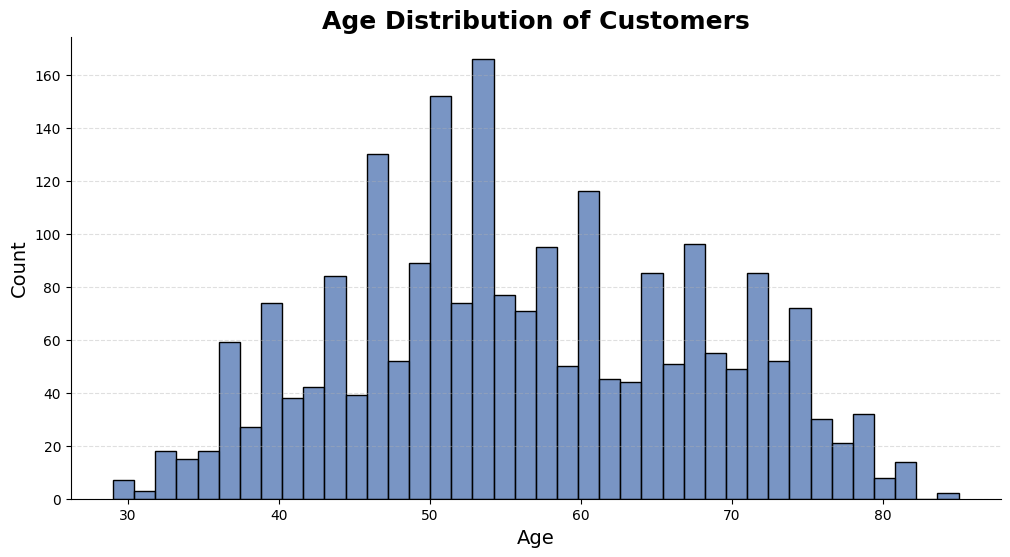

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(
    cust_segment.loc[cust_segment["Age"]<=100,"Age"],
    bins=40,
    color="#4C72B0",
    edgecolor="black"
)
plt.title('Age Distribution of Customers', fontsize=18, weight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4)
sns.despine()
plt.show()


### **This plot represents the distribution of education across different levels.**

In [ ]:
import plotly.express as px




edu_counts = cust_segment["Education"].value_counts().reset_index()
edu_counts.columns = ["Education", "Count"]

fig = px.bar(
    edu_counts,
    x="Education",
    y="Count",
    color="Education",
    template="plotly_white",
    color_discrete_sequence=px.colors.qualitative.Safe,
    title="Education Distribution"
)

fig.update_traces(marker_line_color="black", marker_line_width=1.2, opacity=1)
fig.update_layout(xaxis_title="Education Level", yaxis_title="Count", title_x=0.5)
fig.show()


### The barplot below represents total spendings by each education category,as we see

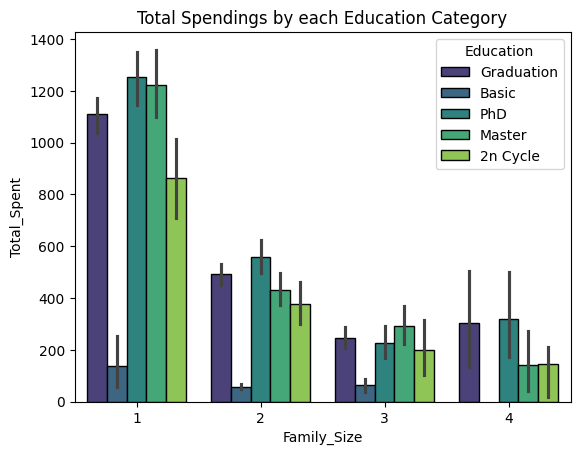

In [ ]:
sns.barplot(data=cust_segment,x='Family_Size',y='Total_Spent',hue="Education",edgecolor="black",palette='viridis')
plt.title('Total Spendings by each Education Category')
plt.show()

### The plot below shows the total spending for each family size. For example, the highest spending comes from families of size one.

In [ ]:
import plotly.express as px

fig = px.violin(
    cust_segment,
    x='Family_Size',
    y='Total_Spent',
    color='Family_Size',
    box=True,
    points='all',
    hover_data=cust_segment.columns,
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    title='Total Spending by Family Size',
    xaxis_title='Family Size',
    yaxis_title='Total Spent',
    template='plotly_white'
)

fig.show()


### **All spending categories show a right-skewed (right-tailed) distribution—most customers have low spending, with a few high-spending outliers.**

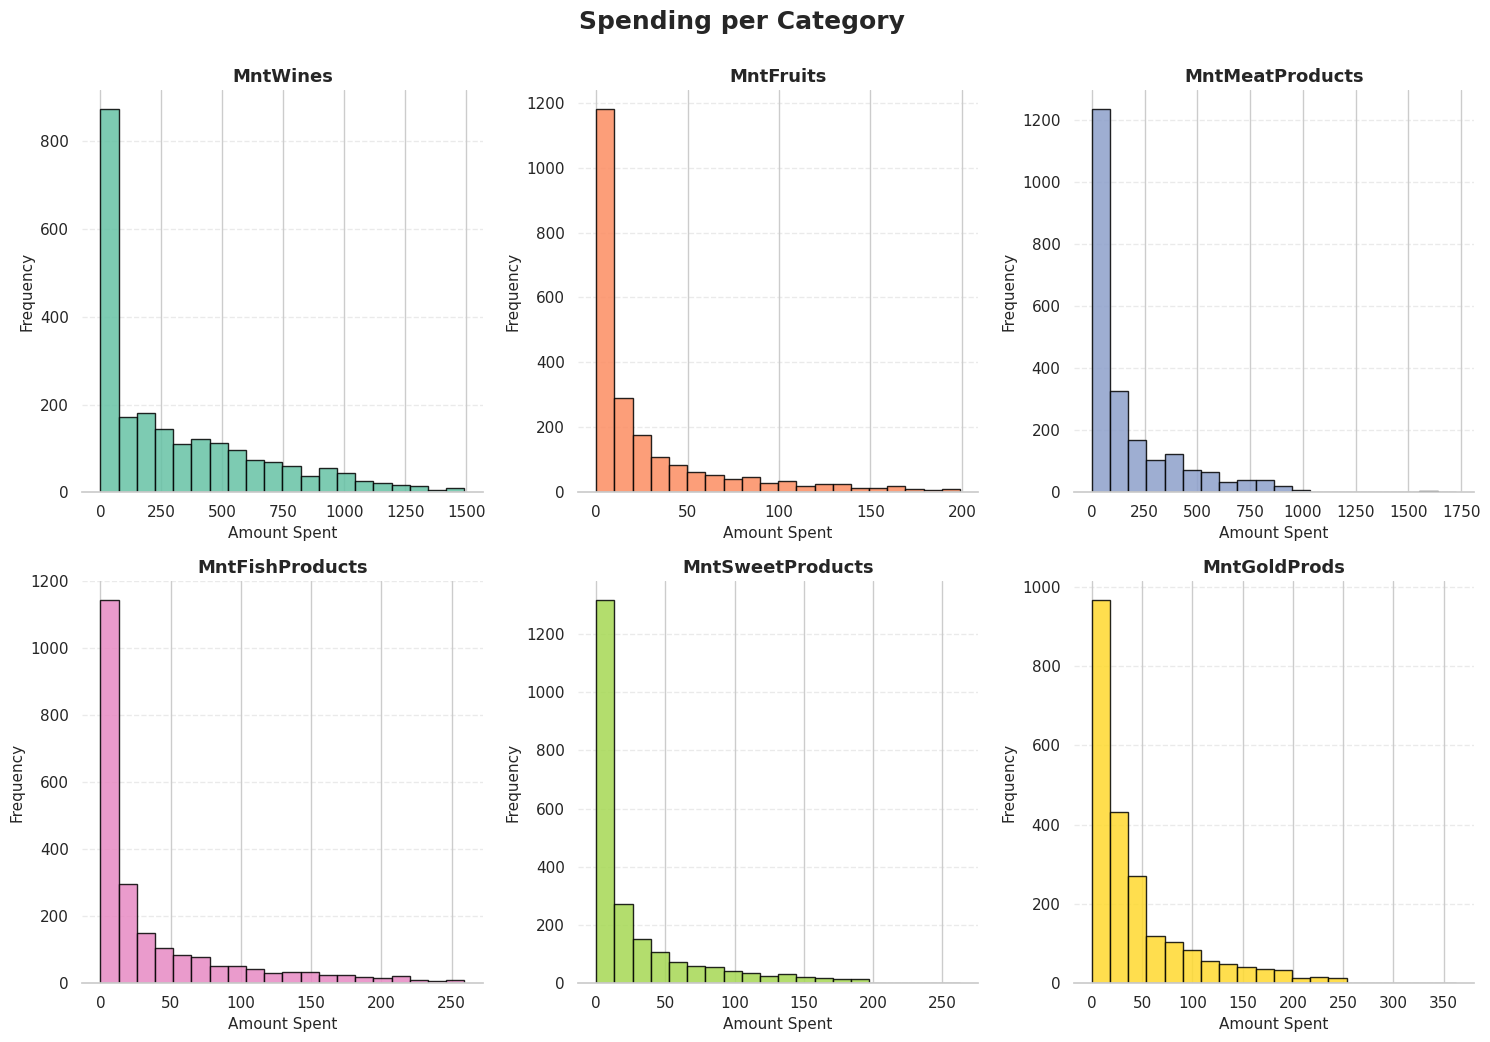

In [ ]:
spending = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds'
]

sns.set_theme(style='whitegrid')

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

palette = sns.color_palette("Set2")

for i, col in enumerate(spending):
    axes[i].hist(
        cust_segment[col],
        bins=20,
        color=palette[i % len(palette)],
        edgecolor='black',
        alpha=0.85
    )

    axes[i].set_title(col, fontsize=13, weight='bold')
    axes[i].set_xlabel("Amount Spent", fontsize=11)
    axes[i].set_ylabel("Frequency", fontsize=11)

    axes[i].grid(axis='y', linestyle='--', alpha=0.4)
    sns.despine(ax=axes[i], left=True, bottom=False)

if len(spending) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.suptitle("Spending per Category", fontsize=18, weight='bold', y=1.04)
plt.show()


**The histograms are right scewed,this means all customers have the same behaviour in spending for a product**

### **The table below shows the correlation between spending categories. The higher the correlation, the more strongly the categories are related to each other.**

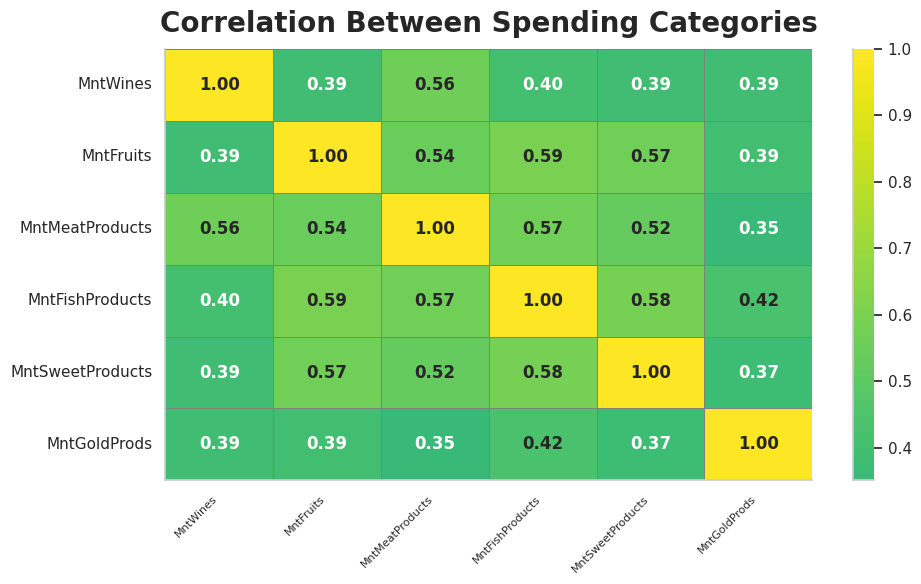

In [ ]:
plt.figure(figsize=(10, 6))

sns.heatmap(
    cust_segment[spending].corr(),
    annot=True,
    fmt=".2f",
    cmap="viridis",
    linewidths=0.5,
    linecolor='gray',
    annot_kws={"size": 12, "weight": "bold"},
    center=0
)


plt.title(
    "Correlation Between Spending Categories",
    fontsize=20,
    weight='bold',
    pad=12
)

plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=11)
sns.despine(left=False, bottom=False)
plt.tight_layout()

plt.show()


### **This histogram shows that income is strongly left-skewed,most customers have relatively lower incomes, while a small number earn much more (made clearer by the log-scaled x-axis).**

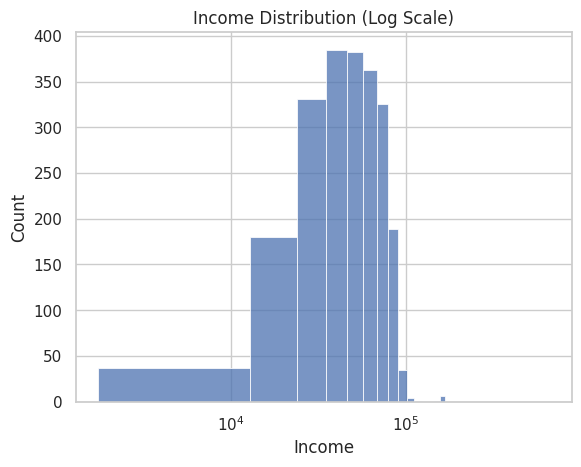

In [ ]:
sns.histplot(cust_segment['Income'], bins=60)
plt.xscale('log')
plt.title("Income Distribution (Log Scale)")
plt.show()

In [ ]:
import plotly.express as px

rate = (cust_segment.groupby("Education")["Total_Accepted"]
        .mean()
        .reset_index(name="AcceptanceRate"))

fig = px.bar(rate, x="Education", y="AcceptanceRate",
             template="plotly_white", title="Acceptance Rate by Education")
fig.update_layout(title_x=0.5, yaxis_tickformat=".0%")
fig.show()


<Axes: xlabel='Online_Share', ylabel='Count'>

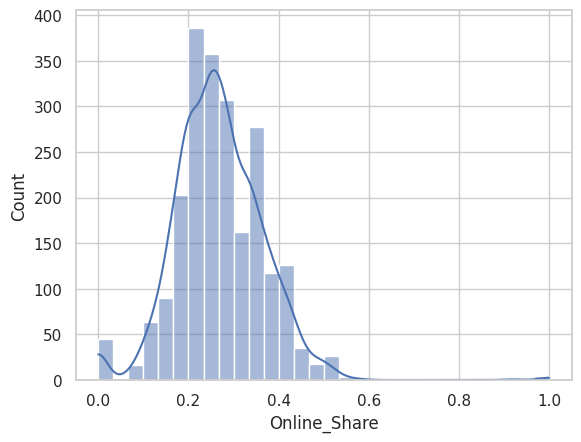

In [ ]:
sns.histplot(cust_segment['Online_Share'], kde=True, bins=30)


Text(0.5, 1.0, 'Recency Distribution')

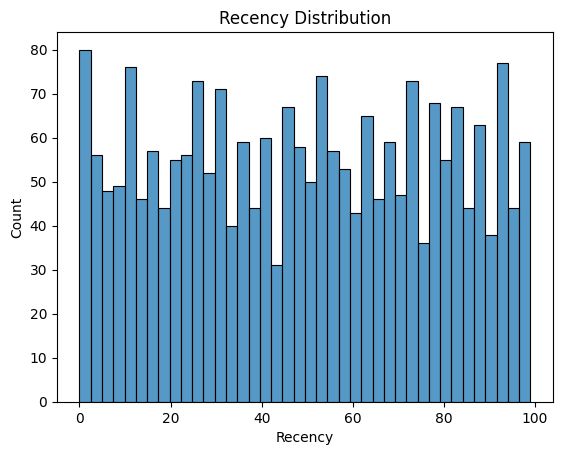

In [ ]:
sns.histplot(cust_segment['Recency'], bins=40)
plt.title("Recency Distribution")


In [ ]:
grouped=cust_segment.groupby('Marital_Status')[['NumWebPurchases','NumStorePurchases','NumDealsPurchases']].mean().reset_index()
grouped

,Marital_Status,NumWebPurchases,NumStorePurchases,NumDealsPurchases
0,Couple,4.085180,5.804709,2.364958
1,Other,5.250000,6.250000,3.500000
2,Separated,4.388350,5.967638,2.411003
3,Single,3.879917,5.629400,2.140787


**MODEL SELECTION & IMPLEMENTATION**

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,DBSCAN
from sklearn.manifold import TSNE


### **StandardScaler**
We used StandardScaler simply because KMeans doesn’t work well when features are on different scales — it starts grouping by the biggest numbers instead of actual patterns.  
Scaling ensures that all variables contribute equally to the distance calculations.

### **PCA (Principal Component Analysis)**
PCA was needed only to visualize the data in 2D, since clustering in high-dimensional space cannot be interpreted visually.  
The clustering itself was performed on normalized data, not on PCA components.

### **KMeans**
KMeans ended up being the main method because it is stable, works well with continuous scaled features, and provides clusters that are easy to understand and interpret.

### **DBSCAN**
DBSCAN was also tested, but it produced too many tiny clusters and a large number of noise points.  
Because of that, it was not suitable for this dataset and was used only for exploratory comparison.

In [ ]:
df_model=cust_segment.copy()
cols_to_delete=[
    'Education','Marital_Status','MntWines','MntFruits',
    'MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
    'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
df_model=df_model.drop(columns=cols_to_delete)


**Unnecessary columns were removed before normalization to avoid noise and improve cluster quality.
All preprocessing was performed on a copy of the dataset to preserve the original data.
This ensures that KMeans produces more accurate and stable clusters.**

In [ ]:
df_model

,Income,Recency,Total_Accepted,Total_Purchase,Total_Spent,Online_Share,Catalog_Share,Store_Share,WineShare,MeatShare,SweetShare,GoldShare,FruitShare,Marital_Status_Encoded,Education_Encoded,Age,Family_Size
0,58138.0,58,0,25,1617,0.320000,0.400000,0.160000,0.392703,0.337662,0.054422,0.054422,0.054422,3,2,68,1
1,46344.0,38,0,6,27,0.166667,0.166667,0.333333,0.407407,0.222222,0.037037,0.222222,0.037037,3,2,71,3
2,71613.0,26,0,21,776,0.380952,0.095238,0.476190,0.548969,0.163660,0.027062,0.054124,0.063144,0,2,60,1
3,26646.0,26,0,8,53,0.250000,0.000000,0.500000,0.207547,0.377358,0.056604,0.094340,0.075472,0,2,41,2
4,58293.0,94,0,19,422,0.263158,0.157895,0.315789,0.409953,0.279621,0.063981,0.035545,0.101896,0,4,44,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,0,18,1341,0.500000,0.166667,0.222222,0.528710,0.135720,0.087994,0.184191,0.032066,0,2,58,2
2236,64014.0,56,1,22,444,0.363636,0.090909,0.227273,0.914414,0.067568,0.000000,0.018018,0.000000,0,4,79,4
2237,56981.0,91,1,19,1241,0.105263,0.157895,0.684211,0.731668,0.174859,0.009670,0.019339,0.038678,2,2,44,1
2238,69245.0,8,0,23,843,0.260870,0.217391,0.434783,0.507711,0.253855,0.035587,0.072361,0.035587,0,3,69,2


In [ ]:
df_model.columns

Index(['Income', 'Recency', 'Total_Accepted', 'Total_Purchase', 'Total_Spent',
       'Online_Share', 'Catalog_Share', 'Store_Share', 'WineShare',
       'MeatShare', 'SweetShare', 'GoldShare', 'FruitShare',
       'Marital_Status_Encoded', 'Education_Encoded', 'Age', 'Family_Size'],
      dtype='object')

In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(df_model)
df_normalized=pd.DataFrame(data=X_scaled,columns=scaler.get_feature_names_out())


In [ ]:
#pca projection pca
pca=PCA(n_components=0.95)
X_pca=pca.fit_transform(df_normalized)


In [ ]:
df_pca=pd.DataFrame(data=X_pca,columns=pca.get_feature_names_out())

<p align="center">
<b>MODEL EVALUATION</b><br>
ELBOW METHOD &nbsp;&nbsp;|&nbsp;&nbsp; SILHOUETTE SCORE &nbsp;&nbsp;|&nbsp;&nbsp; DAVIES-BOULDIN INDEX
</p>


In [ ]:
!pip install kneed

In [ ]:
from sklearn.metrics import silhouette_score,davies_bouldin_score
from kneed import KneeLocator

In [ ]:
"--ELBOW METHOD--"
from kneed import KneeLocator
wcss=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(df_pca)
  wcss.append(kmeans.inertia_)

k_values=range(2,11)
kneedle = KneeLocator(k_values, wcss, curve='convex', direction='decreasing')
elbow_k = kneedle.knee
print('Elbow point:', elbow_k)

Elbow point: 4


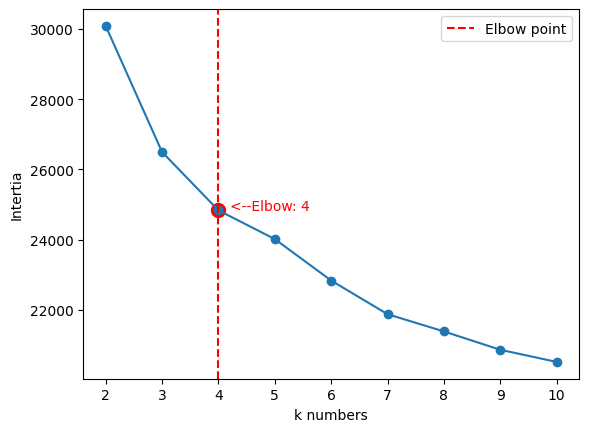

In [ ]:

plt.plot(range(2,11),wcss,marker='o')
plt.ylabel('Intertia')
plt.xlabel('k numbers')

plt.axvline(x=elbow_k, color='red', linestyle='--', label='Elbow point')
plt.scatter(elbow_k, wcss[elbow_k-2], color='red', s=100)
plt.text(elbow_k+0.2, wcss[elbow_k-2], f'<--Elbow: {elbow_k}', color='red')
plt.legend()
plt.show()

In [ ]:
"--SILHOUETTE SCORE--"
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,random_state=42)
  labels=kmeans.fit_predict(df_pca)
  score=silhouette_score(df_pca,labels)
  print(f'{k} and score {score:.3f}')


2 and score 0.166
3 and score 0.151
4 and score 0.119
5 and score 0.091
6 and score 0.101
7 and score 0.108
8 and score 0.099
9 and score 0.093
10 and score 0.091


In [ ]:
dvi=davies_bouldin_score(df_pca,labels)
dvi

np.float64(2.2695186718149762)

**Davies boulding score says the clusters are not very compact ,or the distances between cluster centers are not very large relatively to their spread**

In [ ]:
#--KMEANS--"
kmeans=KMeans(
    n_clusters=elbow_k,
    n_init=10,
    init='k-means++',
    random_state=42
)
cluster_labels = kmeans.fit_predict(df_pca)
df_pca['Clusters'] = cluster_labels

**VISUALIZATION & INTERPRETATION**

Hyperparameter tuning was performed for KMeans (k selection) and DBSCAN (eps graph).
DBSCAN did not yield meaningful structure

In [ ]:
pca2=PCA(n_components=2)
X_pca2=pca2.fit_transform(df_pca.drop(columns=['Clusters']))
df_vis=pd.DataFrame(X_pca2,columns=['PCA1','PCA2'])
df_vis['Clusters']=df_pca['Clusters']
df_vis

,PCA1,PCA2,Clusters
0,2.677244,-1.727898,0
1,-1.401051,0.790443,3
2,0.911915,-0.009085,1
3,-2.262028,-0.617718,3
4,0.358011,-0.170421,1
...,...,...,...
2235,0.821013,0.123760,1
2236,1.852022,4.073502,1
2237,1.350551,-0.384764,0
2238,1.425351,0.386985,1


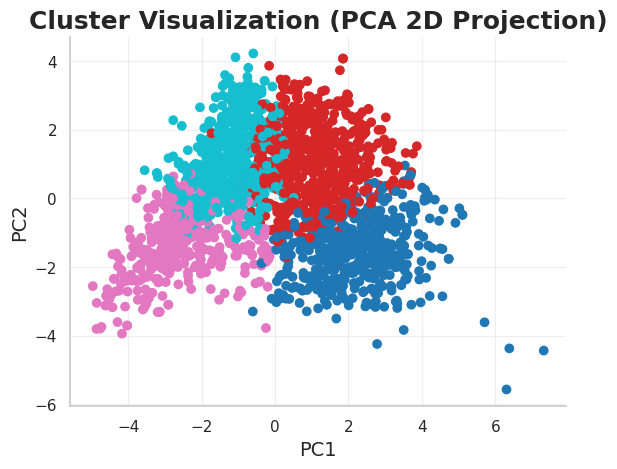

In [ ]:
plt.scatter(df_vis['PCA1'],df_vis['PCA2'],c=df_vis['Clusters'],cmap='tab10')
plt.title("Cluster Visualization (PCA 2D Projection)", fontsize=18, weight='bold')
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.grid(alpha=0.3)
sns.despine()

plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



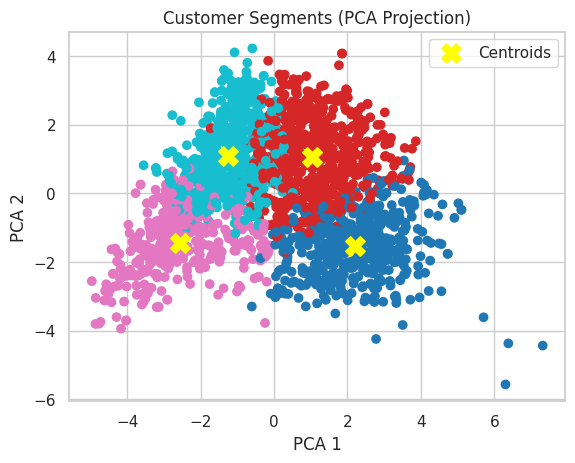

In [ ]:
centroids=kmeans.cluster_centers_
centroid_pca=pca2.transform(centroids)
plt.scatter(df_vis['PCA1'],df_vis['PCA2'],c=df_vis['Clusters'],cmap='tab10')
plt.scatter(centroid_pca[:,0],centroid_pca[:,1],c='yellow',marker='X',s=200,label='Centroids')
plt.title('Customer Segments (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

**This is how main 4 clusters looks like in PCA dimension,we see PCA has done it quite fine**

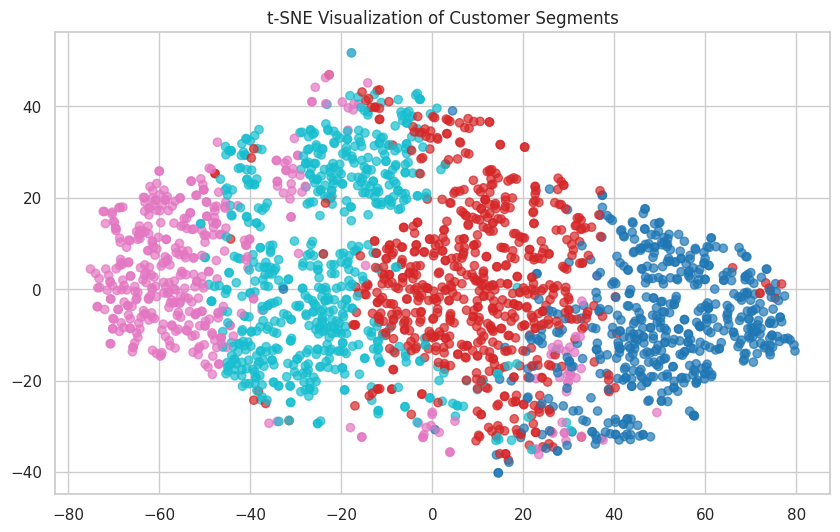

In [ ]:

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(df_normalized)

plt.figure(figsize=(10,6))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=cluster_labels, cmap="tab10", alpha=0.7)
plt.title("t-SNE Visualization of Customer Segments")
plt.show()


**For visualization I tried T-SNE to show how'd it look like when I use it,to be clear ,the plot suggests that the data has an elogated or sequential structure in the original space.Some clusters may appear to merge because there are trabsition points or bridges connecting them**

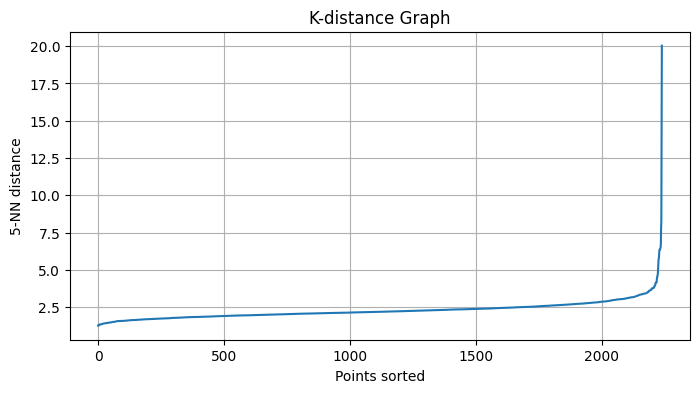

In [ ]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_pca)
distances, indices = neighbors_fit.kneighbors(df_pca)

k_distances = np.sort(distances[:, 4])
plt.figure(figsize=(8,4))
plt.plot(k_distances)
plt.title("K-distance Graph")
plt.xlabel("Points sorted")
plt.ylabel("5-NN distance")
plt.grid()
plt.show()


**as we see,the elbow is appeared nearly in 3.75 eps**

In [ ]:
dbscan = DBSCAN(eps=3.75, min_samples=5)
df_pca["DBSCAN_Cluster"] = dbscan.fit_predict(df_pca)
df_pca["DBSCAN_Cluster"].unique()

array([ 0, -1])

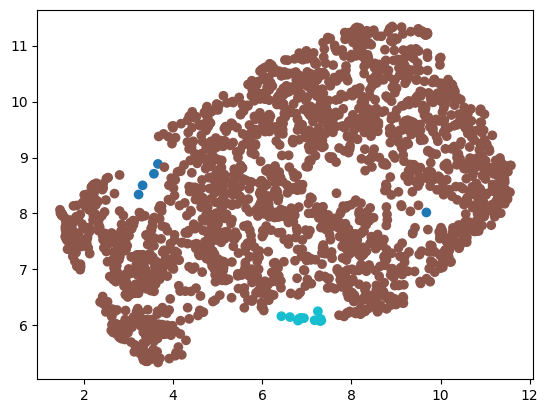

In [ ]:
import umap
from sklearn.cluster import DBSCAN

umap_model = umap.UMAP(n_neighbors=30, min_dist=0.1)
umap_data = umap_model.fit_transform(df_normalized)

dbscan = DBSCAN(eps=0.3, min_samples=5)
db_labels = dbscan.fit_predict(umap_data)
plt.scatter(umap_data[:,0],umap_data[:,1],c=db_labels,cmap='tab10')


**KMeans suggests 4 clusters (silhouette k=2,0.166 ) while dbscan finds only one cluster with many noise groups.This indicates that data naturally forms 1 mmain cluster with noise,but for segmentation it is not informative,this is why I consider 4 clusters.**

** From a business perspective this means that while the overall customer base appears unified ,it is still possible and valuable to segment it further to identify actionable groups for targeted marketing,personalized offers or loyalty programs.Using method like KMeans we can extract meaninglful subgroups that align with the company's business model and help optimize strategies for different customer segments**

In [ ]:
cluster_profile=df_model.copy()
cluster_profile['Clusters']=df_pca['Clusters']
cluster_profile.head()

,Income,Recency,Total_Accepted,Total_Purchase,Total_Spent,Online_Share,Catalog_Share,Store_Share,WineShare,MeatShare,SweetShare,GoldShare,FruitShare,Marital_Status_Encoded,Education_Encoded,Age,Family_Size,Clusters
0,58138.0,58,0,25,1617,0.320000,0.400000,0.160000,0.392703,0.337662,0.054422,0.054422,0.054422,3,2,68,1,0
1,46344.0,38,0,6,27,0.166667,0.166667,0.333333,0.407407,0.222222,0.037037,0.222222,0.037037,3,2,71,3,3
2,71613.0,26,0,21,776,0.380952,0.095238,0.476190,0.548969,0.163660,0.027062,0.054124,0.063144,0,2,60,1,1
3,26646.0,26,0,8,53,0.250000,0.000000,0.500000,0.207547,0.377358,0.056604,0.094340,0.075472,0,2,41,2,3
4,58293.0,94,0,19,422,0.263158,0.157895,0.315789,0.409953,0.279621,0.063981,0.035545,0.101896,0,4,44,2,1


**The radar chart compares the normalized behavioral and demographic characteristics of the four customer clusters. Each axis represents a key feature, allowing us to visually assess how clusters differ in spending power, engagement, and purchasing patterns. The chart clearly shows distinct profiles, demonstrating that the segmentation successfully captured meaningful customer groups.**

The code below shows the top spenders for each group of clusters

In [ ]:
top_customers=cluster_profile.groupby('Clusters')['Total_Spent'].max().reset_index()
top_customers

,Clusters,Total_Spent
0,0,2525
1,1,1910
2,2,1029
3,3,684


Now, we will name these groups

In [ ]:

cluster_profile['Segment']=cluster_profile['Clusters'].map({0:'High-Value Permium Spenders',1:'Mid-Spenders',2:'Economy Shoppers',3:'Low-Spenders'})
segment_group=cluster_profile.groupby('Segment')['Total_Spent'].max().reset_index()
segment_group.sort_values(by='Total_Spent')

,Segment,Total_Spent
2,Low-Spenders,684
0,Economy Shoppers,1029
3,Mid-Spenders,1910
1,High-Value Permium Spenders,2525


In [ ]:
cluster_profile['Marital_Status']=cust_segment['Marital_Status']


In [ ]:
sum_status=(
    cluster_profile.groupby(['Segment','Clusters','Marital_Status'])['Total_Spent'].sum().reset_index(name='Sum_by_Status')
)
segment_sum=(
    cluster_profile.groupby(['Segment','Clusters'])['Total_Spent'].sum().reset_index(name='Segment_Sum')
)
merged=sum_status.merge(segment_sum,on=['Segment','Clusters'])
merged['Share_%']=np.round(merged['Sum_by_Status']/merged['Segment_Sum'] ,2)*100
segment_size=(
    cluster_profile.groupby(['Segment','Clusters','Marital_Status']).size().reset_index(name='Counts')
)

final_segment=merged.merge(segment_size,on=['Segment','Clusters','Marital_Status']).sort_values(by=['Clusters'],ascending=[True])
final_segment

,Segment,Clusters,Marital_Status,Sum_by_Status,Segment_Sum,Share_%,Counts
3,High-Value Permium Spenders,0,Couple,448503,731164,61.0,316
6,High-Value Permium Spenders,0,Single,190449,731164,26.0,136
5,High-Value Permium Spenders,0,Separated,89827,731164,12.0,69
4,High-Value Permium Spenders,0,Other,2385,731164,0.0,2
12,Mid-Spenders,1,Separated,94320,499067,19.0,113
13,Mid-Spenders,1,Single,71225,499067,14.0,97
10,Mid-Spenders,1,Couple,332674,499067,67.0,463
11,Mid-Spenders,1,Other,848,499067,0.0,2
1,Economy Shoppers,2,Separated,5045,62293,8.0,39
0,Economy Shoppers,2,Couple,43078,62293,69.0,275


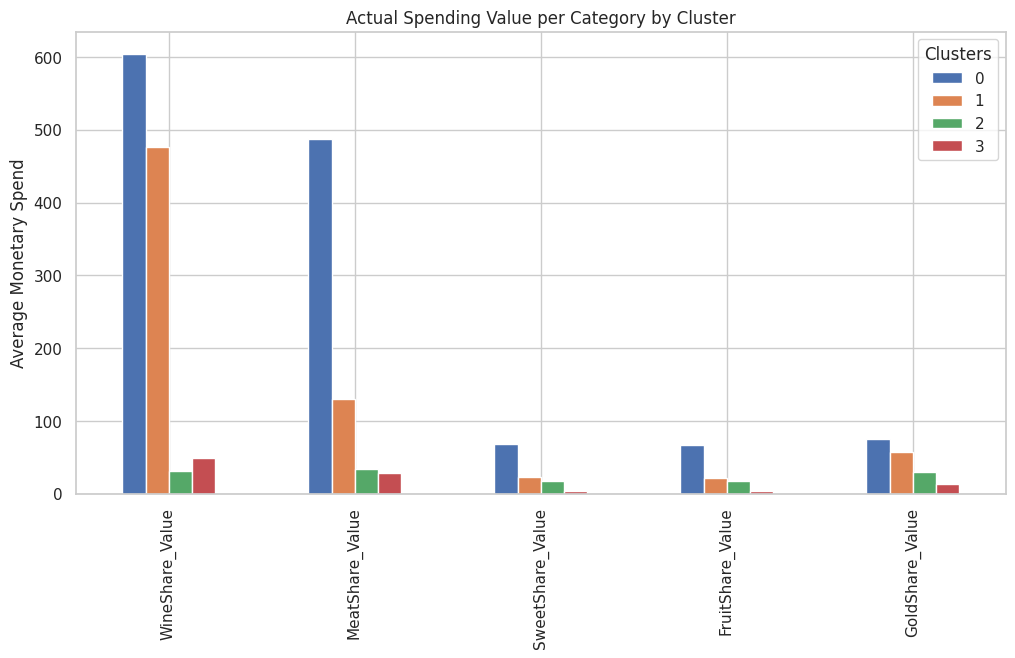

In [ ]:
value_cols = ['WineShare','MeatShare','SweetShare','FruitShare','GoldShare']

for col in value_cols:
    cluster_profile[col + "_Value"] = cluster_profile[col] * cluster_profile['Total_Spent']

cluster_values = cluster_profile.groupby('Clusters')[[col + "_Value" for col in value_cols]].mean()
cluster_values
cluster_values.T.plot(kind='bar', figsize=(12,6))
plt.title("Actual Spending Value per Category by Cluster")
plt.ylabel("Average Monetary Spend")
plt.show()


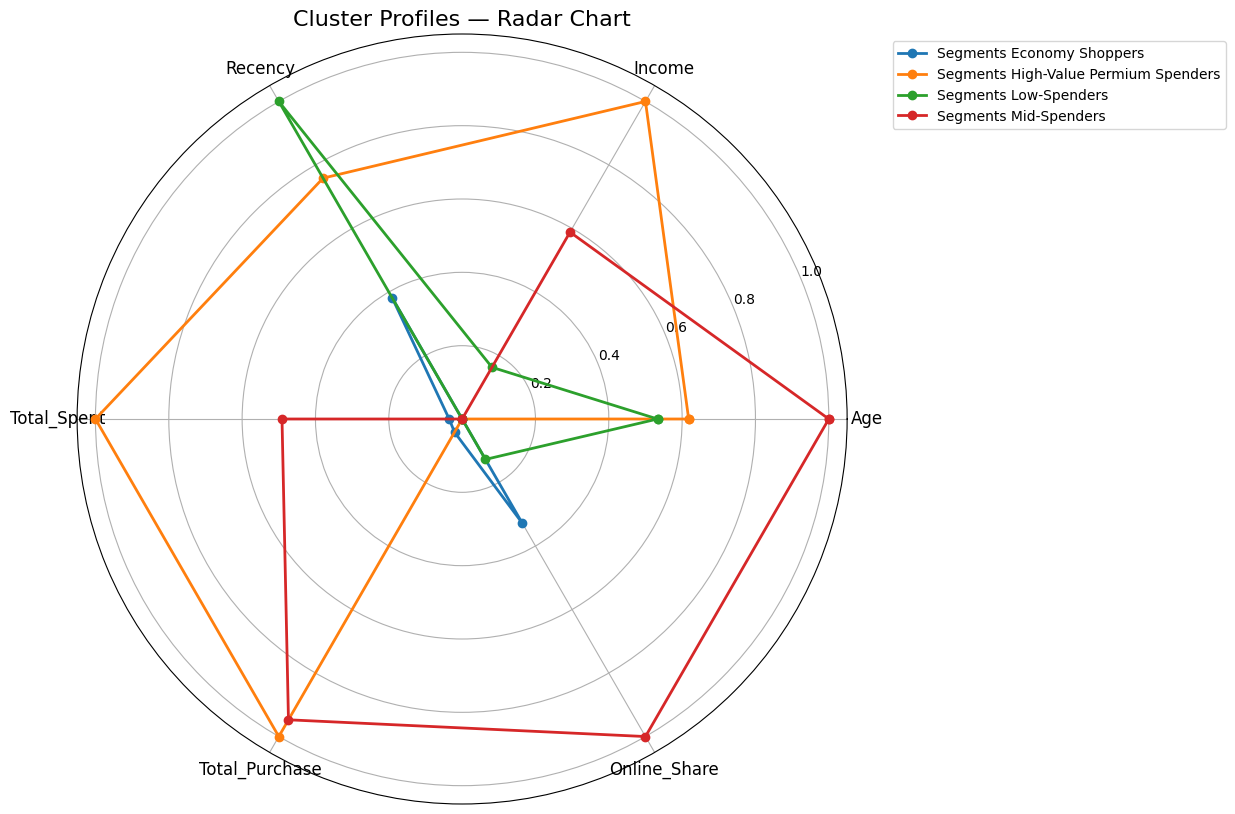

In [ ]:
radar_features = [
    'Age', 'Income', 'Recency', 'Total_Spent',
    'Total_Purchase', 'Online_Share'
]
cluster_centers = cluster_profile.groupby('Segment')[radar_features].mean()
cluster_centers
mm = MinMaxScaler()

scaled_centers = pd.DataFrame(
    mm.fit_transform(cluster_centers),
    columns=radar_features,
    index=cluster_centers.index
)

labels = radar_features
num_vars = len(labels)

# angle
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

plt.figure(figsize=(10, 10))

for cluster_id in scaled_centers.index:
    values = scaled_centers.loc[cluster_id].values
    values = np.concatenate((values, [values[0]]))

    plt.polar(angles, values, marker='o', linewidth=2, label=f'Segments {cluster_id}')

plt.xticks(angles[:-1], labels, fontsize=12)
plt.title("Cluster Profiles — Radar Chart", fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()



In [ ]:
group_campaign=cluster_profile.groupby('Clusters')[['Online_Share','Catalog_Share','Store_Share','Total_Purchase']].mean().reset_index()
group_campaign.sort_values(by='Total_Purchase')

,Clusters,Online_Share,Catalog_Share,Store_Share,Total_Purchase
3,3,0.245485,0.049203,0.447147,8.225962
2,2,0.261624,0.072554,0.438637,8.748804
1,1,0.315756,0.150789,0.361121,20.161481
0,0,0.235240,0.296692,0.405723,20.826004


###High-Value Premium Spenders and Mid-Spenders have the lowest median Recency, meaning these groups are more recently active.

###Low-Spenders and Economy Shoppers show higher Recency medians and wider spreads, suggesting less frequent and more irregular engagement.

/tmp/ipython-input-1811710479.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




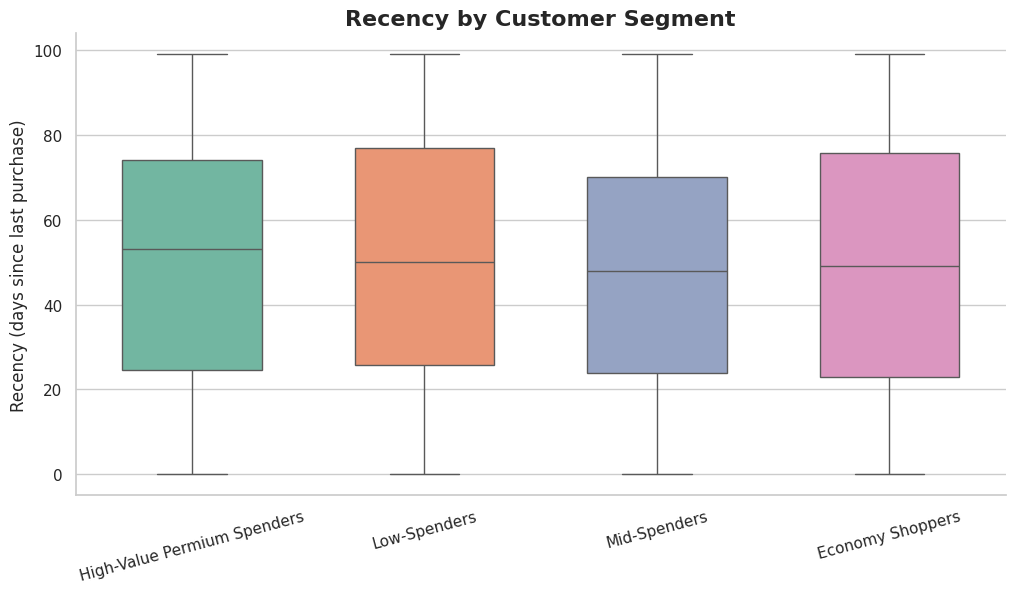

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Segment',
    y='Recency',
    data=cluster_profile,
    palette="Set2",
    width=0.6
)
plt.title("Recency by Customer Segment", fontsize=16, weight='bold')
plt.xlabel("")
plt.ylabel("Recency (days since last purchase)")
plt.xticks(rotation=15)
sns.despine()
plt.show()


### Comparison of Clustering and Visualization Methods

| Method | Type | Purpose | Strengths | Weaknesses |
|--------|------|----------|-----------|-------------|
| **StandardScaler** | Preprocessing | Normalize feature scales | Makes distance-based models valid | Doesn't enhance an information, only scales |
| **PCA** | Dimensionality Reduction | 2D visualization of structure | Good for understanding clusters | Not used for actual clustering |
| **KMeans** | Clustering | Segment customers into k groups | Simple, fast, interpretable | Requires choosing k |
| **DBSCAN** | Clustering | Density-based grouping | Detects noise, arbitrary shapes | Creates too many small clusters |
| **Elbow Method** | Evaluation | Determine optimal k | Easy visual interpretation | Not always clear elbow |
| **Silhouette Score** | Evaluation | Cluster separation quality | Quantitative metric | Decreases in high-dim data |
| **Davies–Bouldin Index** | Evaluation | Measures cluster compactness | Lower = better | Sensitive to noise |
| **Radar Chart** | Visualization | Compare profiles of clusters | Very intuitive | Needs normalized data |
| **PCA Scatterplot** | Visualization | Show cluster separation | Good overview | Only 2D projection |
